In [1]:
pip install xgboost scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
import xgboost as xgb

# Convert data into DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for the model
params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'max_depth': 3,                   # Maximum depth of trees
    'learning_rate': 0.1,             # Step size for each iteration
    'subsample': 0.8,                 # Fraction of samples used for training
    'colsample_bytree': 0.8,          # Fraction of features used for training
    'seed': 42                        # Random seed for reproducibility
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

In [5]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.28851653534824134


We'll use the Breast Cancer Dataset to classify whether a tumor is benign (non-cancerous) or malignant (cancerous).

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [14]:
from xgboost import XGBClassifier

# ✅ Correct: Set `n_estimators` directly in the constructor
model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

In [17]:
# Set XGBoost parameters
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',  # Logarithmic loss
    'max_depth': 3,  # Tree depth
    'learning_rate': 0.1,  # Step size
    'n_estimators': 100  # Number of trees
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)


c:\Users\navin\anaconda3\envs\llms\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:17:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [12]:
# Make predictions on the test set
y_pred_prob = model.predict(dtest)  # Probability scores
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]  # Convert to binary output

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")

# Display classification report
print(classification_report(y_test, y_pred))

XGBoost Model Accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



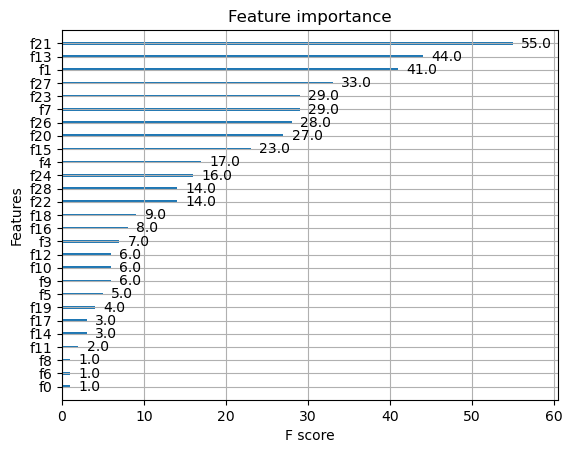

In [13]:
# Plot feature importance
xgb.plot_importance(model)
plt.show()